<a href="https://colab.research.google.com/github/Unknownub3201/demo-repo/blob/master/Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical - 1.1

In [1]:
  class first:
    def __init__(self, graph, start, goal):
        self.start = start
        self.goal = goal
        self.graph = graph

    def bfs(self):
        explored = []
        queue = [[self.start]]
        if self.start == self.goal:
            return "The starting path is the goal"
        while queue:
            path = queue.pop(0)
            node = path[-1]
            if node not in explored:
                neighbours = self.graph[node]
                for neighbour in neighbours:
                    new_path = list(path)
                    new_path.append(neighbour)
                    queue.append(new_path)
            if neighbour==self.goal:
                return new_path
            explored.append(node)
        return "No connecting path exists"


graph = {'A':['Z','S','T'],
        'B':['U','P','G','F'],
        'C':['D','R','P'],
        'D':['M'],
        'E':['H'],
        'F':['S','B'],
        'I':['V','N'],
        'L':['T','M'],
        'O':['Z','S'],
        'P':['R'],
        'U':['V'],
        'Z':['O','A'],
        'S':['O','A','R','F'],
        'T':['A','L'],
        'M':['L','D'],
        'R':['S','P','C']}

f = first(graph,'A','B')
print(f.bfs())

['A', 'S', 'F', 'B']


Practical - 1.2

In [2]:
graph = {'Arad':['Zerind','Sibiu','Timisoara'],
        'Bucharest':['Urziceni','Pitesti','Giurgiu','Fagaras'],
        'Craiova':['Dobreta','Rimnicu Vilcea','Pitesti'],
        'Dobreta':['Mehadia'],
        'Eforie':['Hirsova'],
        'Iasai':['Vaslui','Neamt'],
        'Lugoj':['Timisoara','Mehadia'],
        'Oradea':['Zerind','Sibiu'],
        'Pitesti':['Rimnicu Vilcea'],
        'Urziceni':['Vaslui'],
        'Zerind':['Oradea','Arad'],
        'Sibiu':['Oradea','Arad','Rimnicu Vilcea','Fagaras'],
        'Timisoara':['Arad','Lugoj'],
        'Mehadia':['Lugoj','Dobreta'],
        'Rimnicu Vilcea':['Sibiu','Pitesti','Craiova'],
        'Fagaras':['Sibiu','Bucharest'],
        'Giurgiu':['Bucharest'],
        'Vaslui':['Urziceni','Iasai'],
        'Neamt':['Iasai']}


def IDDFS(root, goal):
    depth = 0
    while True:
        print(f"Looping at depth {depth}")
        result = DLS(root, goal, depth)
        print(f"Result:{result, goal}")
        if result == goal:
            return result
        depth += 1


def DLS(node, goal, depth):
    print(f"Node: {node,goal,depth}")
    if depth == 0 and node == goal:
        print("--Found Goal, Returning--")
        return node
    elif depth > 0:
        print("Looping through children: {graph.get(node,[])}")
        for child in graph.get(node,[]):
            if goal == DLS(child, goal, depth-1):
                return goal

IDDFS('Arad','Bucharest')

Looping at depth 0
Node: ('Arad', 'Bucharest', 0)
Result:(None, 'Bucharest')
Looping at depth 1
Node: ('Arad', 'Bucharest', 1)
Looping through children: {graph.get(node,[])}
Node: ('Zerind', 'Bucharest', 0)
Node: ('Sibiu', 'Bucharest', 0)
Node: ('Timisoara', 'Bucharest', 0)
Result:(None, 'Bucharest')
Looping at depth 2
Node: ('Arad', 'Bucharest', 2)
Looping through children: {graph.get(node,[])}
Node: ('Zerind', 'Bucharest', 1)
Looping through children: {graph.get(node,[])}
Node: ('Oradea', 'Bucharest', 0)
Node: ('Arad', 'Bucharest', 0)
Node: ('Sibiu', 'Bucharest', 1)
Looping through children: {graph.get(node,[])}
Node: ('Oradea', 'Bucharest', 0)
Node: ('Arad', 'Bucharest', 0)
Node: ('Rimnicu Vilcea', 'Bucharest', 0)
Node: ('Fagaras', 'Bucharest', 0)
Node: ('Timisoara', 'Bucharest', 1)
Looping through children: {graph.get(node,[])}
Node: ('Arad', 'Bucharest', 0)
Node: ('Lugoj', 'Bucharest', 0)
Result:(None, 'Bucharest')
Looping at depth 3
Node: ('Arad', 'Bucharest', 3)
Looping through 

'Bucharest'

Practical - 2.1

In [5]:
import queue as Q
from RMP import dict_gn
from RMP import dict_hn

start='Arad'
goal='Bucharest'
result=''

def get_fn(citystr):
    cities=citystr.split(" , ")
    hn=gn=0
    for ctr in range(0, len(cities)-1):
        gn=gn+dict_gn[cities[ctr]][cities[ctr+1]]
    hn=dict_hn[cities[len(cities)-1]]
    return(hn+gn)

def expand(cityq):
    global result
    tot, citystr, thiscity=cityq.get()
    if thiscity==goal:
        result=citystr+" : : "+str(tot)
        return
    for cty in dict_gn[thiscity]:
        cityq.put((get_fn(citystr+" , "+cty), citystr+" , "+cty, cty))
    expand(cityq)

def main():
    cityq=Q.PriorityQueue()
    thiscity=start
    cityq.put((get_fn(start),start,thiscity))
    expand(cityq)
    print("The A* path with the total is: ")
    print(result)

main()

The A* path with the total is: 
Arad , Sibiu , Rimnicu , Pitesti , Bucharest : : 418


Practical - 2.2

In [6]:
import queue as Q
from RMP import dict_gn
from RMP import dict_hn

start='Arad'
goal='Bucharest'
result=''

def get_fn(citystr):
    cities=citystr.split(',')
    hn=gn=0
    for ctr in range(0,len(cities)-1):
        gn=gn+dict_gn[cities[ctr]][cities[ctr+1]]
    hn=dict_hn[cities[len(cities)-1]]
    return(hn+gn)

def printout(cityq):
    for i in range(0,cityq.qsize()):
        print(cityq.queue[i])

def expand(cityq):
    global result
    tot,citystr,thiscity=cityq.get()
    nexttot=999
    if not cityq.empty():
        nexttot,nextcitystr,nextthiscity=cityq.queue[0]
    if thiscity==goal and tot<nexttot:
        result=citystr+'::'+str(tot)
        return
    print("Expanded city------------------------------",thiscity)
    print("Second best f(n)------------------------------",nexttot)
    tempq=Q.PriorityQueue()
    for cty in dict_gn[thiscity]:
            tempq.put((get_fn(citystr+','+cty),citystr+','+cty,cty))
    for ctr in range(1,3):
        ctrtot,ctrcitystr,ctrthiscity=tempq.get()
        if ctrtot<nexttot:
            cityq.put((ctrtot,ctrcitystr,ctrthiscity))
        else:
            cityq.put((ctrtot,citystr,thiscity))
            break
    printout(cityq)
    expand(cityq)
def main():
    cityq=Q.PriorityQueue()
    thiscity=start
    cityq.put((999,"NA","NA"))
    cityq.put((get_fn(start),start,thiscity))
    expand(cityq)
    print(result)
main()

Expanded city------------------------------ Arad
Second best f(n)------------------------------ 999
(393, 'Arad,Sibiu', 'Sibiu')
(999, 'NA', 'NA')
(447, 'Arad,Timisoara', 'Timisoara')
Expanded city------------------------------ Sibiu
Second best f(n)------------------------------ 447
(413, 'Arad,Sibiu,Rimnicu', 'Rimnicu')
(415, 'Arad,Sibiu,Fagaras', 'Fagaras')
(447, 'Arad,Timisoara', 'Timisoara')
(999, 'NA', 'NA')
Expanded city------------------------------ Rimnicu
Second best f(n)------------------------------ 415
(415, 'Arad,Sibiu,Fagaras', 'Fagaras')
(417, 'Arad,Sibiu,Rimnicu', 'Rimnicu')
(447, 'Arad,Timisoara', 'Timisoara')
(999, 'NA', 'NA')
Expanded city------------------------------ Fagaras
Second best f(n)------------------------------ 417
(417, 'Arad,Sibiu,Rimnicu', 'Rimnicu')
(450, 'Arad,Sibiu,Fagaras', 'Fagaras')
(447, 'Arad,Timisoara', 'Timisoara')
(999, 'NA', 'NA')
Expanded city------------------------------ Rimnicu
Second best f(n)------------------------------ 447
(417, '

Practical - 3


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
PlayTennis = pd.read_csv("./PlayTennis.csv")

In [ ]:
PlayTennis

outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])

In [ ]:
PlayTennis

outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0

In [ ]:
x = PlayTennis['play']
y = PlayTennis.drop(['play'], axis=1)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(x,y)

ValueError: ignored

Practical - 4

In [ ]:
import numpy as np
class NeuralNetwork():
  def __init__(self):
    np.random.seed()
    self.synaptic_weights = 2 * np.random.random((3,1))-1

  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

  def sigmoidDerivative(self, x):
    return x*(1-x)

  def train(self, trainingInputs, trainingOuputs, trainingIterations):
    for iteration in range(trainingIterations):
      output = self.think(trainingInputs)
      error = trainingOutputs - output
      adjustments = np.dot(trainingInputs.T, error*self.sigmoidDerivative(output))
      self.synaptic_weights += adjustments

  def think(self, inputs):
    inputs = inputs.astype(float)
    output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
    return output

if __name__ == "__main__":
  nn = NeuralNetwork()
  print("Beginning Randomly Generated Weights.")
  print(nn.synaptic_weights)
  trainingInputs = np.array([[0, 0, 1],
                             [1, 1, 1],
                             [1, 0, 1],
                             [0, 1, 1]])
  trainingOutputs = np.array([[0, 1, 1, 0]]).T
  nn.train(trainingInputs, trainingOutputs, 15000)
  print("Ending Weights After Training:")
  print(nn.synaptic_weights)

  userInpOne = float(input("Input One: "))
  userInpTwo = float(input("Input Two: "))
  userInpThree = float(input("Input Three: "))

  print("Considering New situations: ",userInpOne, userInpTwo, userInpThree)
  print("New Output Data: ")
  print(nn.think(np.array([userInpOne, userInpTwo, userInpThree])))

Beginning Randomly Generated Weights.
[[ 0.28934565]
 [-0.80103502]
 [ 0.25934115]]
Ending Weights After Training:
[[10.08739814]
 [-0.20768305]
 [-4.83713787]]
Input One: 2
Input Two: 3
Input Three: 2
Considering New situations:  2.0 3.0 2.0
New Output Data: 
[0.99994868]


Practical - 5

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

df = pd.read_csv("./diabetes.csv")
df.head()
df.shape
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.isnull().values.any()

False

In [ ]:
zeroNotAllowed = ["Glucose", "BloodPressure", "SkinThickness"]
for column in zeroNotAllowed:
  df[column] = df[column].replace(0, np.NaN)
  mean = int(df[column].mean(skipna = True))
  df[column] = df[column].replace(np.NaN, mean)
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.682292      72.386719      29.108073   79.799479   
std       3.369578   30.435999      12.096642       8.791221  115.244002   
min       0.000000   44.000000      24.000000       7.000000    0.000000   
25%       1.000000   99.750000      64.000000      25.000000    0.000000   
50%       3.000000  117.000000      72.000000      29.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state = 0, test_size = 0.2)

print("Train Size: ",xTrain.shape)
print("Test Size: ", xTest.shape)

Train Size:  (614, 7)
Test Size:  (154, 7)


In [ ]:
clf = svm.SVC(kernel="rbf")
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Predicted Values: ",yPred)

Predicted Values:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [ ]:
print("Accuracy: ", accuracy_score(yTest, yPred))

Accuracy:  0.7922077922077922


In [ ]:
cm = confusion_matrix(yTest, yPred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[98  9]
 [23 24]]


In [ ]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



Practical - 6

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array=dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 30
#kfold makes trees with split number.
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
#n_estimators: This is the number of trees you want to build before predictions.
#Higher number of trees give you better voting optionsand perfomance performance
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y)
print(results.mean())


0.7617774382480265


Practical - 7

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
df= pd.read_csv('./disease.csv')


In [ ]:
df.head()

Sore Troat Fever Swollen Glands Congestion Headache     Diagnosis
0        yes   yes            yes        yes      yes  Strep throat
1         no    no             no        yes      yes       Allergy
2        yes   yes             no        yes       no          Cold
3        yes    no            yes         no       no  Strep throat
4         no   yes             no        yes       no          Cold

In [ ]:
df.tail()


Sore Troat Fever Swollen Glands Congestion Headache     Diagnosis
5         no    no             no        yes       no       Allergy
6        yes    no            yes         no       no  Strep throat
7        yes    no             no        yes      yes       Allergy
8         no   yes             no        yes      yes          Cold
9        yes   yes             no        yes      yes          Cold

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sore Troat      10 non-null     object
 1   Fever           10 non-null     object
 2   Swollen Glands  10 non-null     object
 3   Congestion      10 non-null     object
 4   Headache        10 non-null     object
 5   Diagnosis       10 non-null     object
dtypes: object(6)
memory usage: 608.0+ bytes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sore Troat']= le.fit_transform(df['Sore Troat'])
df['Fever']= le.fit_transform(df['Fever'])
df['Swollen Glands']= le.fit_transform(df['Swollen Glands'])
df['Congestion']= le.fit_transform(df['Congestion'])
df['Headache']= le.fit_transform(df['Headache'])
df['Diagnosis']= le.fit_transform(df['Diagnosis'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sore Troat      10 non-null     int64
 1   Fever           10 non-null     int64
 2   Swollen Glands  10 non-null     int64
 3   Congestion      10 non-null     int64
 4   Headache        10 non-null     int64
 5   Diagnosis       10 non-null     int64
dtypes: int64(6)
memory usage: 608.0 bytes


In [ ]:
df.head()

Sore Troat  Fever  Swollen Glands  Congestion  Headache  Diagnosis
0           1      1               1           1         1          2
1           0      0               0           1         1          0
2           1      1               0           1         0          1
3           1      0               1           0         0          2
4           0      1               0           1         0          1

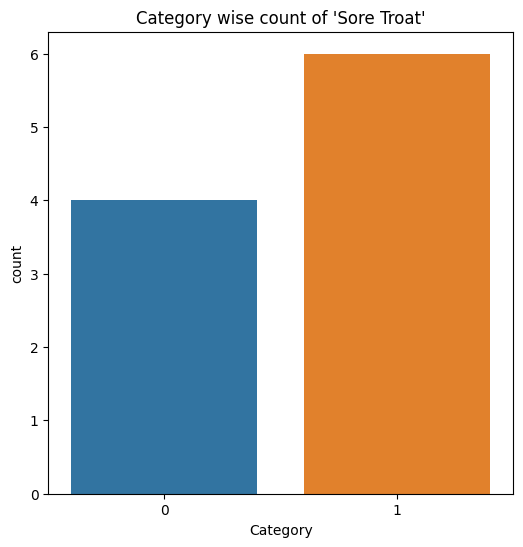

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(x=df['Sore Troat'], data=df)
plt.title("Category wise count of 'Sore Troat'")
plt.xlabel("Category")
plt.ylabel("count")
plt.show()

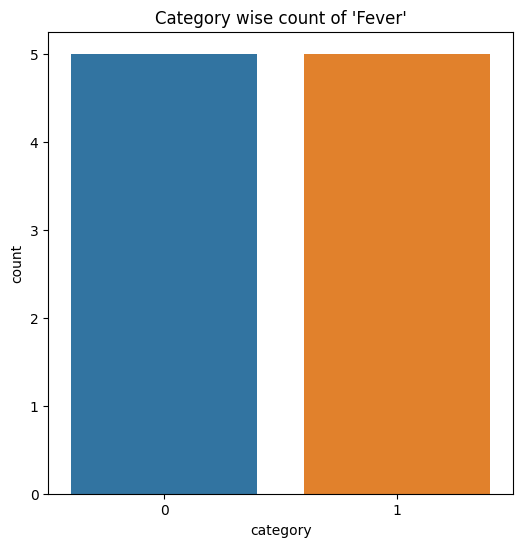

In [ ]:

fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Fever'],data = df)
plt.title ("Category wise count of 'Fever'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

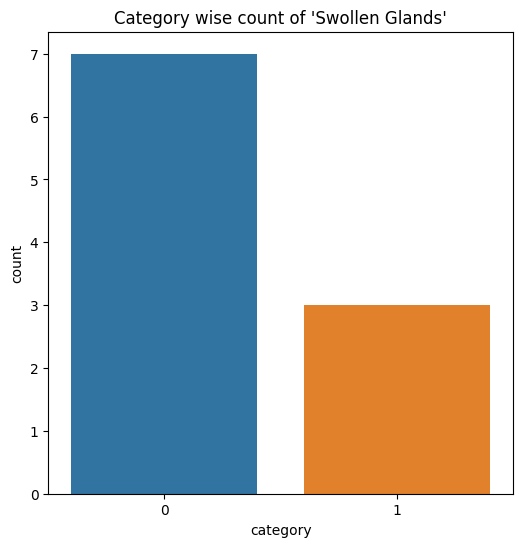

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Swollen Glands'],data = df)
plt.title ("Category wise count of 'Swollen Glands'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

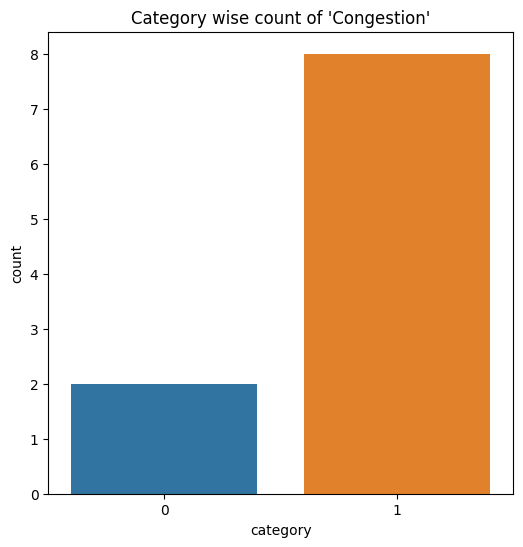

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Congestion'],data = df)
plt.title ("Category wise count of 'Congestion'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

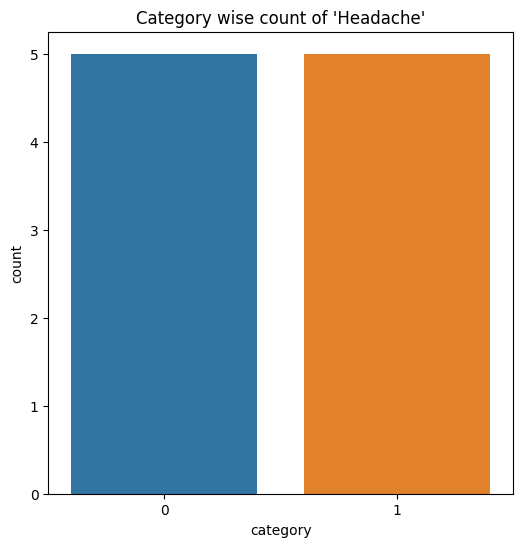

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Headache'],data = df)
plt.title ("Category wise count of 'Headache'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

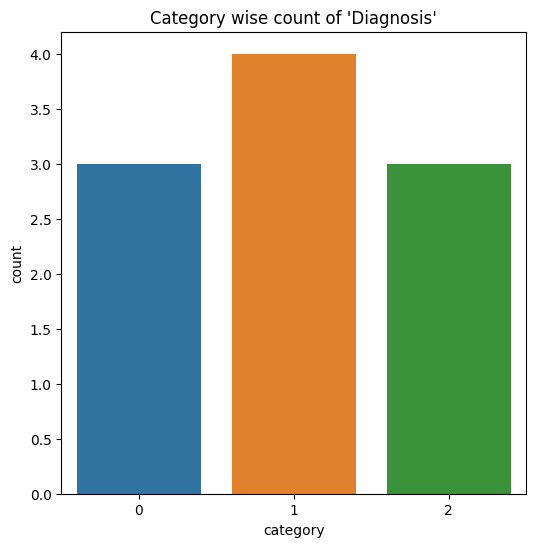

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
sns.countplot(x=df['Diagnosis'],data = df)
plt.title ("Category wise count of 'Diagnosis'")
plt.xlabel("category")
plt.ylabel("count")
plt.show()

In [ ]:
X=df.drop('Diagnosis',axis = 1)
y=df['Diagnosis']

In [ ]:
classifier = MultinomialNB()
classifier.fit(X,y)

MultinomialNB()

In [ ]:
classifier = CategoricalNB()
classifier.fit(X,y)


CategoricalNB()

In [ ]:
classifier = GaussianNB()
classifier.fit(X,y)

GaussianNB()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score, recall_score,f1_score

X_train , X_test, y_train , y_test =train_test_split(X,y,test_size=0.2)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Confusion martix\n", confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:", precision_score (y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion martix
 [[1 0]
 [1 0]]
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 score: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Practical - 8

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df=pd.read_csv('./diabetes.csv')

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [ ]:
y = df_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
X_test.size

2048

In [ ]:
X_train.size

4096

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
print(train_scores)

[1.0, 0.84375, 0.8671875, 0.8359375, 0.828125, 0.8046875, 0.814453125, 0.802734375, 0.798828125, 0.802734375, 0.798828125, 0.79296875, 0.794921875, 0.796875]


In [ ]:
print(test_scores)

[0.73046875, 0.73046875, 0.74609375, 0.7421875, 0.7421875, 0.72265625, 0.74609375, 0.74609375, 0.74609375, 0.73046875, 0.765625, 0.734375, 0.75, 0.734375]


In [ ]:
max_train_score = max(train_scores)

for i in range(len(train_scores)):
  if train_scores[i] == max_train_score:
    train_scores_ind=i+1


    break
print('Max train score {} % and k = {}'.
      format(max_train_score*100,train_scores_ind))

Max train score 100.0 % and k = 1


In [ ]:
max_test_score = max(test_scores)

for i in range(len(test_scores)):
  if test_scores[i] == max_test_score:
    test_scores_ind=i+1
    break
print('Max test score {} % and k = {}'.
      format(max_test_score*100,test_scores_ind))

Max test score 76.5625 % and k = 11


In [ ]:
import seaborn as sns
sns.set()

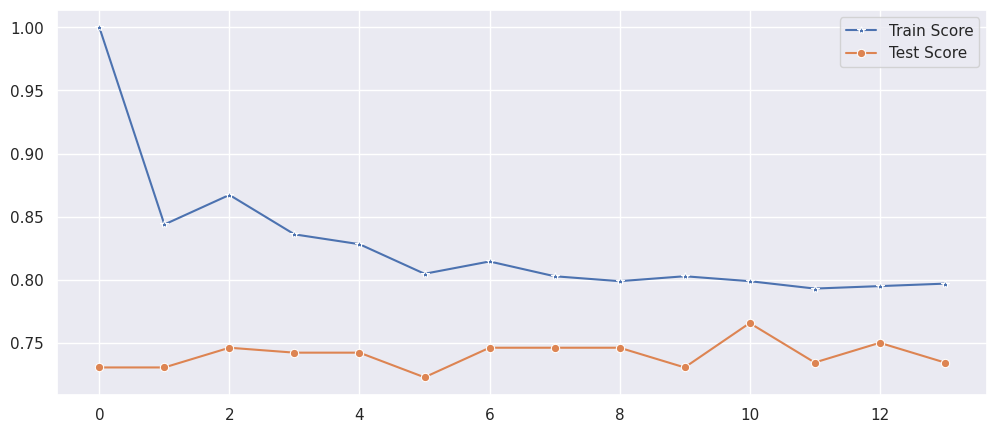

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

In [ ]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'],
            colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          142  25  167
1           35  54   89
All        177  79  256

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



Practical - 9

In [ ]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
try:
    import apyori
except ImportError:
    !pip install apyori
from apyori import apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=0de29b62ae3ada0d85c4204b08119cec1cc390cfd93cfd1697a158d61ec58a68
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
df = pd.read_csv('./Groceries_dataset.csv', parse_dates=['Date'], dayfirst=True)

In [ ]:
df.head()

Member_number       Date   itemDescription
0           1808 2015-07-21    tropical fruit
1           2552 2015-01-05        whole milk
2           2300 2015-09-19         pip fruit
3           1187 2015-12-12  other vegetables
4           3037 2015-02-01        whole milk

In [ ]:
df.isnull().any()

Member_number      False
Date               False
itemDescription    False
dtype: bool

In [ ]:
all_products = df['itemDescription'].unique()
print("Total products: {}".format(len(all_products)))

Total products: 167


In [ ]:
def distribution_plot(x,y,name=None,xaxis=None,yaxis=None):
  fig = go.Figure([
      go.Bar(x=x,y=y)
  ])
  fig.update_layout(
      title_text= name,
      xaxis_title=xaxis,
      yaxis_title = yaxis
  )
  fig.show()

In [ ]:
x = df['itemDescription'].value_counts()
x = x.sort_values(ascending=False)
x = x[:10]
distribution_plot(x=x.index,y=x.values,yaxis="Count",xaxis="Products")

In [ ]:
one_hot = pd.get_dummies(df['itemDescription'])
df.drop('itemDescription',inplace=True,axis=1)
df = df.join(one_hot)
df.head()

Member_number       Date  Instant food products  UHT-milk  \
0           1808 2015-07-21                      0         0   
1           2552 2015-01-05                      0         0   
2           2300 2015-09-19                      0         0   
3           1187 2015-12-12                      0         0   
4           3037 2015-02-01                      0         0   

   abrasive cleaner  artif. sweetener  baby cosmetics  bags  baking powder  \
0                 0                 0               0     0              0   
1                 0                 0               0     0              0   
2                 0                 0               0     0              0   
3                 0                 0               0     0              0   
4                 0                 0               0     0              0   

   bathroom cleaner  ...  turkey  vinegar  waffles  whipped/sour cream  \
0                 0  ...       0        0        0                   0   
1                 0  ...       0        0        0                   0   
2                 0  ...       0        0        0                   0   
3                 0  ...       0        0        0                   0   
4                 0  ...       0        0        0                   0   

   whisky  white bread  white wine  whole milk  yogurt  zwieback  
0       0            0           0           0       0         0  
1       0            0           0           1       0         0  
2       0            0           0           0       0         0  
3       0            0           0           0       0         0  
4       0            0           0           1       0         0  

[5 rows x 169 columns]

In [ ]:
records = df.groupby(['Member_number','Date'])[all_products[:]].apply(sum)
records = records.reset_index()[all_products]
def get_Pnames(x):
  for product in all_products:
    if x[product]>0:
      x[product]=product
  return x
records = records.apply(get_Pnames,axis=1)
records.head()

tropical fruit  whole milk pip fruit other vegetables rolls/buns pot plants  \
0              0  whole milk         0                0          0          0   
1              0  whole milk         0                0          0          0   
2              0           0         0                0          0          0   
3              0           0         0                0          0          0   
4              0           0         0                0          0          0   

  citrus fruit beef frankfurter chicken  ... flower (seeds) rice tea  \
0            0    0           0       0  ...              0    0   0   
1            0    0           0       0  ...              0    0   0   
2            0    0           0       0  ...              0    0   0   
3            0    0           0       0  ...              0    0   0   
4            0    0           0       0  ...              0    0   0   

  salad dressing specialty vegetables pudding powder ready soups  \
0              0                    0              0           0   
1              0                    0              0           0   
2              0                    0              0           0   
3              0                    0              0           0   
4              0                    0              0           0   

  make up remover toilet cleaner preservation products  
0               0              0                     0  
1               0              0                     0  
2               0              0                     0  
3               0              0                     0  
4               0              0                     0  

[5 rows x 167 columns]

In [ ]:
print('Total transactions: {}'.format(len(records)))

Total transactions: 14963


In [ ]:
x= records.values
x = [sub[~(sub==0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x
transactions[0:10]

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

In [ ]:
rules = apriori(transactions,min_support=0.00030,min_confidence=0.05,min_lift=3,min_length=2,target='rules')
association_results = list(rules)
for item in association_results:
  pair=item[0]
  items= [x for x in pair]
  print("Rule: " + items[0] + "-->"+items[1])
  print("Support: " + str(item[1]))
  print("Confidence: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3]))
  print("===================================")

Rule: soda-->artif. sweetener
Support: 0.00046782062420637575
Confidence: 0.2916666666666667
Lift: 3.1442423150816525
Rule: condensed milk-->waffles
Support: 0.0003341575887188398
Confidence: 0.051546391752577324
Lift: 3.200367882961886
Rule: frozen fish-->specialty chocolate
Support: 0.0003341575887188398
Confidence: 0.051546391752577324
Lift: 3.458693541676298
Rule: fruit/vegetable juice-->liver loaf
Support: 0.00040098910646260775
Confidence: 0.12
Lift: 3.9812860310421283
Rule: ham-->pickled vegetables
Support: 0.00046782062420637575
Confidence: 0.059829059829059825
Lift: 3.496961805555555
Rule: meat-->roll products 
Support: 0.0003341575887188398
Confidence: 0.0684931506849315
Lift: 4.06691672102631
Rule: spread cheese-->misc. beverages
Support: 0.0003341575887188398
Confidence: 0.051546391752577324
Lift: 3.4742732423144798
Rule: spread cheese-->sugar
Support: 0.00040098910646260775
Confidence: 0.061855670103092786
Lift: 3.840441459554263
Rule: beef-->whipped/sour cream
Support: 0.

Practical - 10

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np # Added import for NumPy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
emails = [
    "Buy cheap watches! Free shipping!",
    "Meeting for lunch today?",
    "Claim your prize! You've won $1,000,000!",
    "Important meeting at 3 PM.",
    ]
labels = [1, 0, 1, 0]

In [ ]:
max_words = 1000
max_len = 50

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(emails)
sequences = tokenizer.texts_to_sequences(emails)
X_padded = pad_sequences(sequences, maxlen=max_len, padding="post", truncating="post")

# Step 3: Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=16, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Define training data and labels as NumPy arrays
# This is where you convert your training data and labels to NumPy arrays.
# For this example, we will use the same data as 'emails' and 'labels'.
training_data = np.array(X_padded)
training_labels = np.array(labels)

# Step 5: Train the model
model.fit(training_data, training_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6969 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 30ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6906 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6894 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6883 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.6872 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6861 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6851 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6839 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 38ms/step - loss: 0.6828 - accuracy: 0.7500


In [ ]:
# Step 6: Test if 'Spam.txt' is spam or not
file_path = "./Spam.txt"

# Read the content of the 'Sdam.txt' file
with open(file_path, "r", encoding="utf-8") as file:
    sample_email_text = file.read()
# Tokenize and pad the sample email text
sequences_sample = tokenizer.texts_to_sequences([sample_email_text])
sample_email_padded = pad_sequences(sequences_sample, maxlen=max_len, padding="post", truncating="post")
# Use the trained model to make predictions
prediction = model.predict(sample_email_padded)
# Set a classification threshold (e.g., 0.5)
threshold = 0.5

# Classify the sample email based on the threshold
if prediction > threshold:
    print(f"Sample Email ('{file_path}'): SPAM")
else:
    print(f"Sample Email ('{file_path}'): NOT SPAM")

1/1 [==============================] - 0s 145ms/step
Sample Email ('./Spam.txt'): NOT SPAM


In [ ]:
# Step 6: Test if 'NSpam.txt' is spam or not
file_path = "./NSpam.txt"

# Read the content of the 'NSpam.txt' file
with open(file_path, "r", encoding="utf-8") as file:
    sample_email_text = file.read()
# Tokenize and pad the sample email text
sequences_sample = tokenizer.texts_to_sequences([sample_email_text])
sample_email_padded = pad_sequences(sequences_sample, maxlen=max_len, padding="post", truncating="post")
# Use the trained model to make predictions
prediction = model.predict(sample_email_padded)
# Set a classification threshold (e.g., 0.5)
threshold = 0.5

# Classify the sample email based on the threshold
if prediction > threshold:
    print(f"Sample Email ('{file_path}'): SPAM")
else:
    print(f"Sample Email ('{file_path}'): NOT SPAM")

1/1 [==============================] - 0s 24ms/step
Sample Email ('./NSpam.txt'): SPAM
